In [2]:
import tensorflow as tf
from tensorflow.keras import layers, models
import numpy as np
import os

# ========================================
# 경로 설정
# ========================================
DATA_DIR = '/content/drive/MyDrive/2025-2 MLP/source/cifar10_data'  # CIFAR-10 데이터를 저장할 경로

# 데이터 디렉토리 생성
os.makedirs(DATA_DIR, exist_ok=True)

# --- CIFAR-10 로드 (자동으로 캐싱) ---
# Keras는 기본적으로 ~/.keras/datasets에 저장하지만,
# 명시적으로 경로를 지정하려면 아래와 같이 처리
cifar10_path = os.path.join(DATA_DIR,'cifar-10-batches-py')

if os.path.exists(cifar10_path):
    print(f"✓ 기존 데이터 발견: {cifar10_path}")
    print("저장된 데이터를 로드합니다...")
else:
    print(f"데이터가 없습니다. {DATA_DIR}에 다운로드합니다...")

# 데이터 로드 (없으면 자동 다운로드 후 캐싱)
(x_train, y_train),(x_test, y_test) = tf.keras.datasets.cifar10.load_data()

print(f"✓ 데이터 로드 완료")
print(f"  - 학습 데이터: {x_train.shape}")
print(f"  - 테스트 데이터: {x_test.shape}\n")

# 클래스 이름 정의
class_names = ['airplane','automobile','bird','cat','deer',
               'dog','frog','horse','ship','truck']

# 사용할 클래스 선택
selected_classes = ['cat','dog','horse']
selected_idx = [class_names.index(c)for c in selected_classes]

# --- 해당 클래스만 필터링 ---
train_mask = np.isin(y_train, selected_idx).flatten()
test_mask = np.isin(y_test, selected_idx).flatten()

x_train, y_train = x_train[train_mask], y_train[train_mask]
x_test, y_test = x_test[test_mask], y_test[test_mask]

print(f"선택된 클래스: {selected_classes}")
print(f"  - 학습 샘플 수: {len(x_train)}")
print(f"  - 테스트 샘플 수: {len(x_test)}\n")

# 라벨을 0~2로 다시 매핑
label_map = {v: i for i, v in enumerate(selected_idx)}
y_train = np.array([label_map[int(y)]for y in y_train])
y_test = np.array([label_map[int(y)]for y in y_test])

# 정규화
x_train, x_test = x_train / 255.0, x_test / 255.0

데이터가 없습니다. /content/drive/MyDrive/2025-2 MLP/source/cifar10_data에 다운로드합니다...
170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step
✓ 데이터 로드 완료
  - 학습 데이터: (50000, 32, 32, 3)
  - 테스트 데이터: (10000, 32, 32, 3)

선택된 클래스: ['cat', 'dog', 'horse']
  - 학습 샘플 수: 15000
  - 테스트 샘플 수: 3000



/tmp/ipython-input-1290869381.py:53: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  y_train = np.array([label_map[int(y)]for y in y_train])
/tmp/ipython-input-1290869381.py:54: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  y_test = np.array([label_map[int(y)]for y in y_test])


In [3]:
# ========================================
# 모델 구축
# ========================================
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(len(selected_classes), activation='softmax') # 선택된 클래스 수에 맞게 출력 레이어 설정
])

# 모델 컴파일
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False), # 라벨이 정수형이므로 SparseCategoricalCrossentropy 사용
              metrics=['accuracy'])

# 모델 요약
model.summary()

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 30, 30, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 15, 15, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 13, 13, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 6, 6, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 4, 4, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 1024)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │        65,600 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 3)              │           195 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 122,115 (477.01 KB)

 Trainable params: 122,115 (477.01 KB)

 Non-trainable params: 0 (0.00 B)

In [4]:
# ========================================
# 모델 학습
# ========================================

# 모델 학습
history = model.fit(x_train, y_train, epochs=10,  # 에포크 수를 적절히 조절
                    validation_data=(x_test, y_test))

# 학습 결과 시각화 (선택 사항)
# import matplotlib.pyplot as plt

# plt.plot(history.history['accuracy'], label='accuracy')
# plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
# plt.xlabel('Epoch')
# plt.ylabel('Accuracy')
# plt.ylim([0.5, 1])
# plt.legend(loc='lower right')
# plt.show()

# 모델 평가
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)
print(f"\n테스트 정확도: {test_acc}")

Epoch 1/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 28s 55ms/step - accuracy: 0.4907 - loss: 0.9658 - val_accuracy: 0.6420 - val_loss: 0.7838
Epoch 2/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 42s 57ms/step - accuracy: 0.6521 - loss: 0.7500 - val_accuracy: 0.7033 - val_loss: 0.6818
Epoch 3/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 41s 56ms/step - accuracy: 0.7033 - loss: 0.6658 - val_accuracy: 0.7010 - val_loss: 0.6628
Epoch 4/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 44s 62ms/step - accuracy: 0.7438 - loss: 0.5960 - val_accuracy: 0.7210 - val_loss: 0.6209
Epoch 5/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 28s 60ms/step - accuracy: 0.7686 - loss: 0.5393 - val_accuracy: 0.7310 - val_loss: 0.6199
Epoch 6/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 35s 48ms/step - accuracy: 0.7885 - loss: 0.5028 - val_accuracy: 0.7457 - val_loss: 0.5979
Epoch 7/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 25s 53ms/step - accuracy: 0.8092 - loss: 0.4500 - val_accuracy: 0.7450 - val_loss: 0.5983
Epoch 8/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 26s 54ms/step - accuracy: 0.8350 - loss: 0.3983 - 

In [1]:
import tensorflow as tf
from tensorflow.keras import layers, models, utils
import numpy as np
import matplotlib.pyplot as plt

In [6]:
DATA_DIR = '/content/drive/MyDrive/2025-2 MLP/source/cifar10_data'

os.makedirs(DATA_DIR, exist_ok=True)

cifar10_path = os.path.join(DATA_DIR, 'cifar-10-batches-py')

if os.path.exists(cifar10_path):
    print(f"✓ 기존 데이터 발견: {cifar10_path}")
    print("저장된 데이터를 로드합니다...")
else:
    print(f"데이터가 없습니다. {DATA_DIR}에 다운로드합니다...")

(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()

print(f"✓ 데이터 로드 완료")
print(f"  - 전체 학습 데이터: {x_train.shape}")
print(f"  - 전체 테스트 데이터: {x_test.shape}\n")

class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

selected_classes = ['cat', 'dog', 'horse']
selected_idx = [class_names.index(c) for c in selected_classes]

train_mask = np.isin(y_train, selected_idx).flatten()
test_mask = np.isin(y_test, selected_idx).flatten()

x_train, y_train = x_train[train_mask], y_train[train_mask]
x_test, y_test = x_test[test_mask], y_test[test_mask]

print(f"선택된 클래스: {selected_classes}")
print(f"  - 필터링 후 학습 샘플 수: {len(x_train)}")
print(f"  - 필터링 후 테스트 샘플 수: {len(x_test)}\n")

label_map = {v: i for i, v in enumerate(selected_idx)}
y_train_mapped = np.array([label_map[int(y)] for y in y_train])
y_test_mapped = np.array([label_map[int(y)] for y in y_test])

x_train, x_test = x_train / 255.0, x_test / 255.0

데이터가 없습니다. /content/drive/MyDrive/2025-2 MLP/source/cifar10_data에 다운로드합니다...
✓ 데이터 로드 완료
  - 전체 학습 데이터: (50000, 32, 32, 3)
  - 전체 테스트 데이터: (10000, 32, 32, 3)

선택된 클래스: ['cat', 'dog', 'horse']
  - 필터링 후 학습 샘플 수: 15000
  - 필터링 후 테스트 샘플 수: 3000



/tmp/ipython-input-4105035425.py:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  y_train_mapped = np.array([label_map[int(y)] for y in y_train])
/tmp/ipython-input-4105035425.py:37: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  y_test_mapped = np.array([label_map[int(y)] for y in y_test])


/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 54596 (\N{HANGUL SYLLABLE PIL}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 53552 (\N{HANGUL SYLLABLE TEO}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 47553 (\N{HANGUL SYLLABLE RING}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 48143 (\N{HANGUL SYLLABLE MIC}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 51204 (\N{HANGUL SYLLABLE JEON}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/us

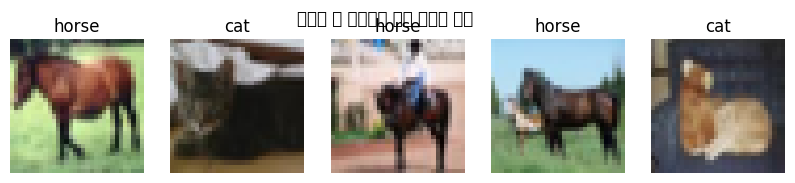

원-핫 인코딩된 훈련 레이블 샘플 (첫 5개):
[[0. 0. 1.]
 [1. 0. 0.]
 [0. 0. 1.]
 [0. 0. 1.]
 [1. 0. 0.]]


In [7]:
plt.figure(figsize=(10, 2))
for i in range(5):
    plt.subplot(1, 5, i+1)
    plt.imshow(x_train[i])
    class_name_idx = y_train_mapped[i]
    plt.title(selected_classes[class_name_idx])
    plt.axis('off')
plt.suptitle("필터링 및 전처리된 훈련 데이터 샘플")
plt.show()

num_classes = len(selected_classes)
y_train_one_hot = utils.to_categorical(y_train_mapped, num_classes)
y_test_one_hot = utils.to_categorical(y_test_mapped, num_classes)

print(f"원-핫 인코딩된 훈련 레이블 샘플 (첫 5개):\n{y_train_one_hot[:5]}")

In [8]:
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),

    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(num_classes, activation='softmax')
])

model.summary()

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)               │ (None, 30, 30, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 15, 15, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 13, 13, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 6, 6, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 4, 4, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 1024)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 64)             │        65,600 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 3)              │           195 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 122,115 (477.01 KB)

 Trainable params: 122,115 (477.01 KB)

 Non-trainable params: 0 (0.00 B)

In [9]:
history = model.fit(x_train, y_train_one_hot,
                    epochs=20,
                    batch_size=64,
                    validation_data=(x_test, y_test_one_hot))

Epoch 1/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 26s 102ms/step - accuracy: 0.4649 - loss: 1.0040 - val_accuracy: 0.6120 - val_loss: 0.8273
Epoch 2/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 22s 93ms/step - accuracy: 0.6422 - loss: 0.7712 - val_accuracy: 0.6403 - val_loss: 0.7801
Epoch 3/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 24s 101ms/step - accuracy: 0.6813 - loss: 0.7160 - val_accuracy: 0.7050 - val_loss: 0.6725
Epoch 4/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 41s 100ms/step - accuracy: 0.7237 - loss: 0.6368 - val_accuracy: 0.7163 - val_loss: 0.6445
Epoch 5/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 22s 92ms/step - accuracy: 0.7489 - loss: 0.5933 - val_accuracy: 0.7273 - val_loss: 0.6168
Epoch 6/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 41s 92ms/step - accuracy: 0.7669 - loss: 0.5495 - val_accuracy: 0.7190 - val_loss: 0.6459
Epoch 7/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 24s 103ms/step - accuracy: 0.7793 - loss: 0.5214 - val_accuracy: 0.7420 - val_loss: 0.5893
Epoch 8/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 21s 91ms/step - accuracy: 0.7987 - loss: 0.474

테스트 데이터 손실(Loss): 0.8962
테스트 데이터 정확도(Accuracy): 0.7540



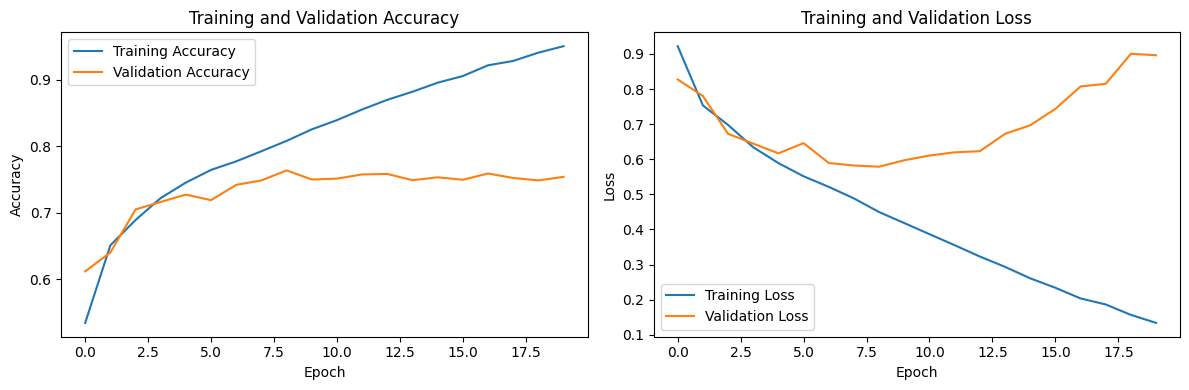

In [10]:
loss, accuracy = model.evaluate(x_test, y_test_one_hot, verbose=0)
print(f"테스트 데이터 손실(Loss): {loss:.4f}")
print(f"테스트 데이터 정확도(Accuracy): {accuracy:.4f}\n")

plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.title('Training and Validation Loss')

plt.tight_layout()
plt.show()

94/94 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step


/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 47784 (\N{HANGUL SYLLABLE MO}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 45944 (\N{HANGUL SYLLABLE DEL}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 50696 (\N{HANGUL SYLLABLE YE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 52769 (\N{HANGUL SYLLABLE CEUG}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 44208 (\N{HANGUL SYLLABLE GYEOL}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr

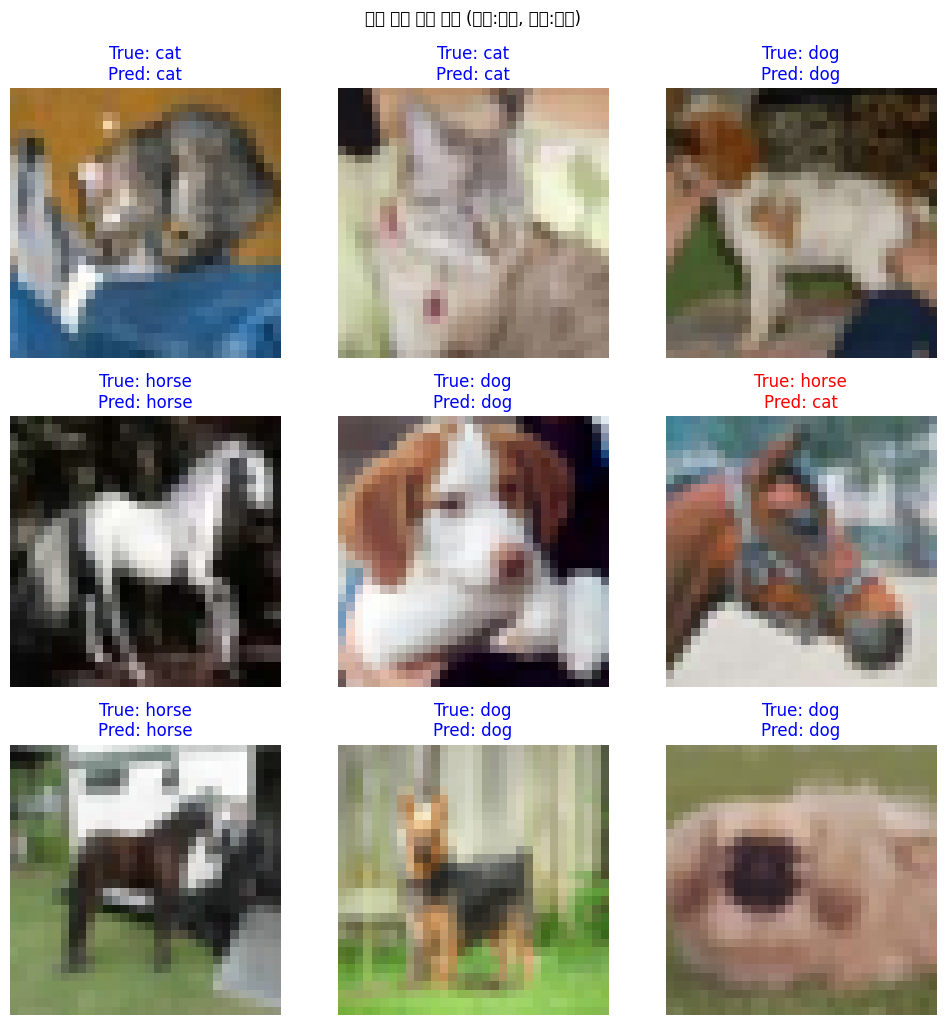

In [13]:
predictions = model.predict(x_test)
predicted_labels = np.argmax(predictions, axis=1)

plt.figure(figsize=(10, 10))
for i in range(9):
    plt.subplot(3, 3, i + 1)
    plt.imshow(x_test[i])
    true_label_name = selected_classes[y_test_mapped[i]]
    predicted_label_name = selected_classes[predicted_labels[i]]

    title_color = 'blue' if true_label_name == predicted_label_name else 'red'
    plt.title(f"True: {true_label_name}\nPred: {predicted_label_name}", color=title_color)
    plt.axis('off')
plt.tight_layout()
plt.suptitle("모델 예측 결과 샘플 (파랑:정답, 빨강:오답)", y=1.02)
plt.show()